In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#图像显示不清楚
%config InlineBackend.figure_format ='svg'

In [2]:
path="E:/33-数学建模资料/研究生数学建模竞赛-2021/process_add.xlsx"
writer=pd.ExcelWriter(path)
Sheet_Name=['PM1','PM2.5','PM10']
for i in Sheet_Name:
    data=pd.read_excel(path,sheet_name=i)
    year=data['时间'].dt.year
    month=data['时间'].dt.month
    data.insert(2,'Year',year)#表格中插入年份
    
    #表格中插入月份
    month_change=[]
    for j in month:
        if j<10:
            j='0'+str(j)
        else:
            j=str(j)
        month_change.append(j)
    data.insert(3,'Month',month_change)
    #写入YearMonth
    YearMonth=[]
    for m,n in zip(year,month_change): 
        YearMonth.append(str(m)+n)
    data.insert(4,'YearMonth',YearMonth)
    #写入表格 
    data.to_excel(writer,sheet_name=i)
writer.save()
writer.close()

In [3]:
#读取文件
def read_file(path,sheet_name):
    data=pd.read_excel(path,sheet_name=sheet_name)
    return data

## 1.1浓度随时间的变化曲线

In [4]:
data1=read_file(path,Sheet_Name[0])#PM1
data2=read_file(path,Sheet_Name[1])#PM2.5
data3=read_file(path,Sheet_Name[2])#PM10

In [5]:
YearMonth1=data1['YearMonth'].unique()
YearMonth1=pd.to_datetime(YearMonth1,format='%Y%m')

YearMonth2=data2['YearMonth'].unique()
YearMonth2=pd.to_datetime(YearMonth2,format='%Y%m')

YearMonth3=data3['YearMonth'].unique()
YearMonth3=pd.to_datetime(YearMonth3,format='%Y%m')

In [6]:
concentration1=data1.groupby(by='YearMonth')['颗粒物浓度（ug/m3）'].mean()
concentration2=data2.groupby(by='YearMonth')['颗粒物浓度（ug/m3）'].mean()
concentration3=data3.groupby(by='YearMonth')['颗粒物浓度（ug/m3）'].mean()

In [7]:
print(concentration1)
print(concentration2)
print(concentration3)

YearMonth
201610    120.225324
201611    123.152302
201612     72.039186
201701    168.439928
201702     90.535384
201703     94.045384
201704     77.145621
201705     59.863208
201706     60.430467
201707     59.892167
201708     53.422296
201709     81.589607
201711     72.258576
201712     56.104021
201801    129.477037
201802    136.253283
201803     80.314728
201804     55.048017
201805     29.804892
Name: 颗粒物浓度（ug/m3）, dtype: float64
YearMonth
201610    210.657637
201611    253.820968
201612    318.185872
201701    432.879879
201702     67.096586
201703    318.280105
201704    282.810479
201705     94.201457
201706     12.924681
201707      9.661800
201708      7.224953
201709     12.409327
201711     25.679797
201712     32.554692
201801     32.598025
201802     33.808057
201803     22.115684
201804      9.423540
201805     10.548449
201806      9.547499
201807      8.215601
201808      8.841386
201809      6.803228
201810     13.523677
201811     24.417422
201812     24.026546


In [8]:
concentration1=np.array(concentration1)
concentration2=np.array(concentration2)
concentration3=np.array(concentration3)

In [9]:
def plot_bar(YearMonth,concentration,str1,color):
    x=YearMonth
    y=concentration
    plt.figure(figsize=(8,6))
    plt.bar(x,y,color=color,width=8)
    plt.xticks(rotation=60)
    plt.tick_params(labelsize=15) #刻度大小
    plt.xlabel('时间',size=16)
    plt.ylabel('颗粒物浓度（ug/m3）',size=16)
#     plt.ylim(0,100)
    plt.savefig('images/'+'1.1_concentration_Bar'+str1+'.jpg',dpi=80, bbox_inches = 'tight')
    plt.show()  

In [10]:
def plot_line(YearMonth,concentration,str1,color):
    #坐标轴刻度旋转
#     import pylab as pl
    x=YearMonth
    y=concentration
    plt.figure(figsize=(8,6))
    plt.plot(x,y,color=color)
    plt.xticks(rotation=60)
    plt.tick_params(labelsize=15) #刻度大小
    plt.xlabel('时间',size=16)
    plt.ylabel('颗粒物浓度（ug/m3）',size=16)
    plt.savefig('images/'+'1.1_concentration_Line'+str1+'.jpg',dpi=80, bbox_inches = 'tight')
    plt.show()  

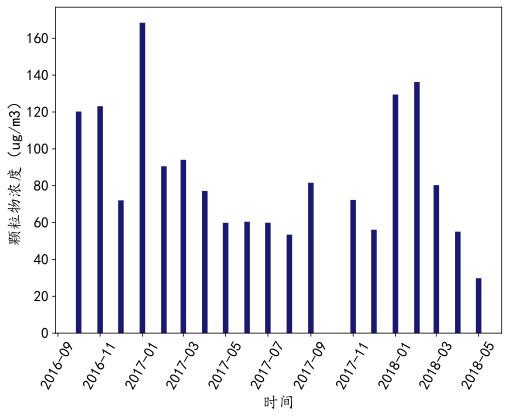

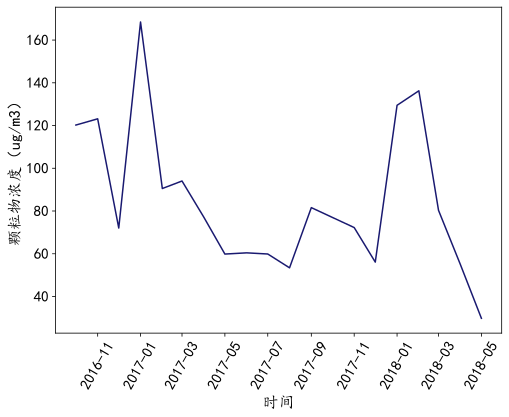

In [11]:
plot_bar(YearMonth1,concentration1,'PM1','MidnightBlue')
plot_line(YearMonth1,concentration1,'PM1','MidnightBlue')

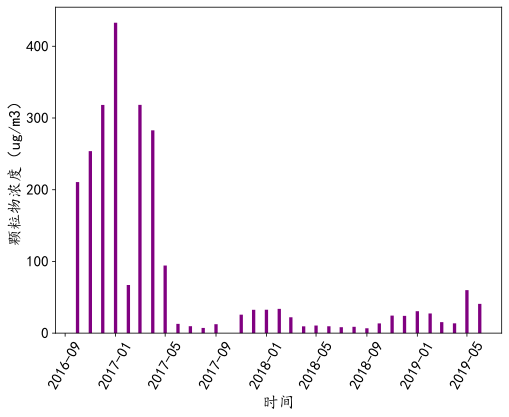

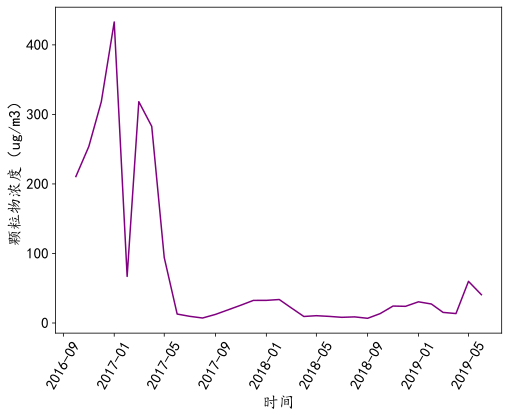

In [12]:
plot_bar(YearMonth2,concentration2,'PM2.5','purple')
plot_line(YearMonth2,concentration2,'PM2.5','purple')

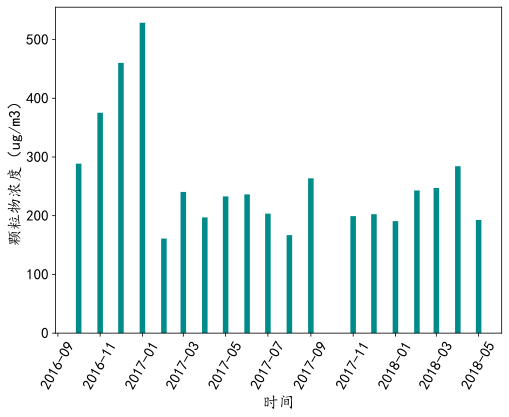

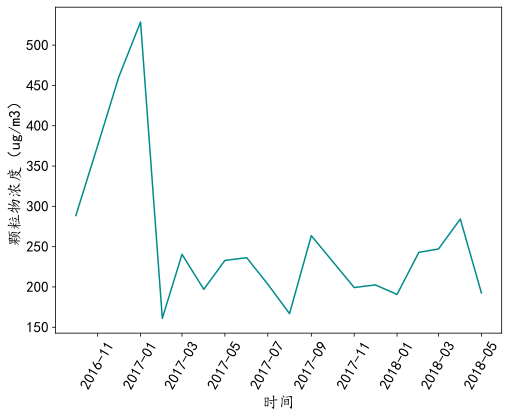

In [13]:
plot_bar(YearMonth3,concentration3,'PM10','darkcyan')
plot_line(YearMonth3,concentration3,'PM10','darkcyan')